In [1]:
import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

('./Skin_NonSkin.txt', <http.client.HTTPMessage at 0x9a90590>)

In [3]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [4]:
df.isna().sum()

B       0
G       0
R       0
skin    0
dtype: int64

In [5]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label copies all but skin
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2)
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [6]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [7]:
label

,skin
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [8]:
alldf = pd.concat([feature,label], sort = True, axis=1)

In [9]:
alldf

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1
5,0.270588,0.313725,0.462745,1
6,0.274510,0.317647,0.466667,1
7,0.274510,0.317647,0.466667,1
8,0.298039,0.341176,0.490196,1
9,0.298039,0.341176,0.490196,1


In [10]:
sample = alldf.sample(1000)

In [12]:
sample.head()

,B,G,R,skin
168138,0.709804,0.698039,0.525490,0
134480,0.470588,0.474510,0.231373,0
42785,0.415686,0.564706,0.819608,1
55682,0.670588,0.654902,0.462745,0
202140,0.270588,0.298039,0.129412,0


In [12]:
sample

,B,G,R,skin
229388,0.207843,0.223529,0.086275,0
236065,0.172549,0.156863,0.137255,0
58971,0.062745,0.054902,0.011765,0
176285,0.149020,0.113725,0.545098,0
20422,0.596078,0.745098,0.996078,1
102366,0.741176,0.737255,0.564706,0
72966,0.278431,0.270588,0.082353,0
113013,0.937255,0.788235,0.650980,0
125031,0.368627,0.039216,0.000000,0
3054,0.768627,0.807843,0.992157,1


In [13]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]

In [14]:
onlybgr

,B,G,R
168138,0.709804,0.698039,0.525490
134480,0.470588,0.474510,0.231373
42785,0.415686,0.564706,0.819608
55682,0.670588,0.654902,0.462745
202140,0.270588,0.298039,0.129412
57815,0.062745,0.043137,0.007843
236520,0.784314,0.776471,0.639216
227453,0.643137,0.654902,0.462745
114940,0.698039,0.694118,0.498039
149150,0.694118,0.682353,0.505882


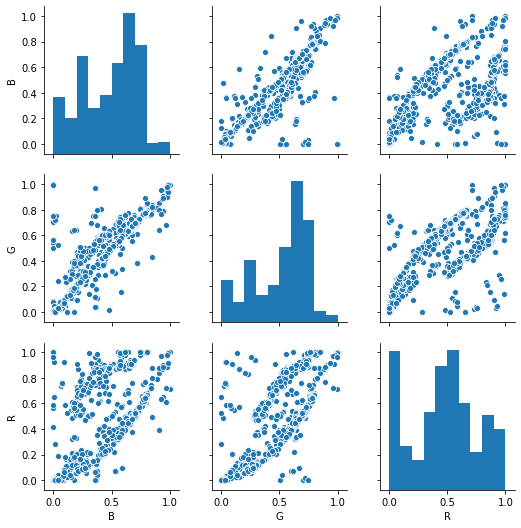

In [15]:
sns.pairplot(onlybgr)

In [15]:
sample_ = sample.copy()

In [16]:
sample_['skin'] = sample.skin.apply(lambda x: {1: 'skin', 0: 'not skin'}.get(x)) #dictionary definition

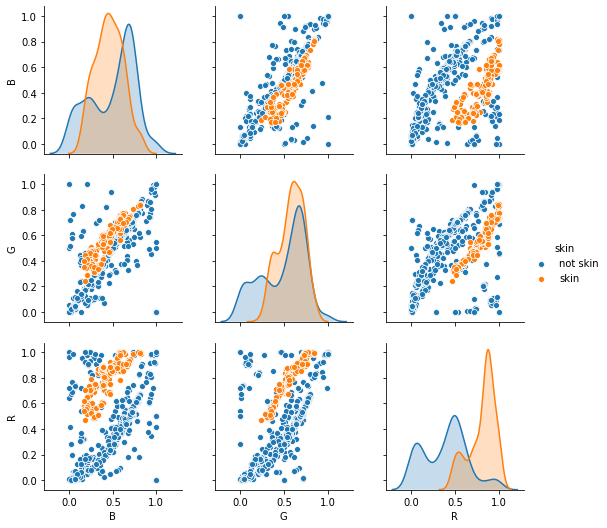

In [17]:
sample_.head()
sns.pairplot(sample_, hue="skin")

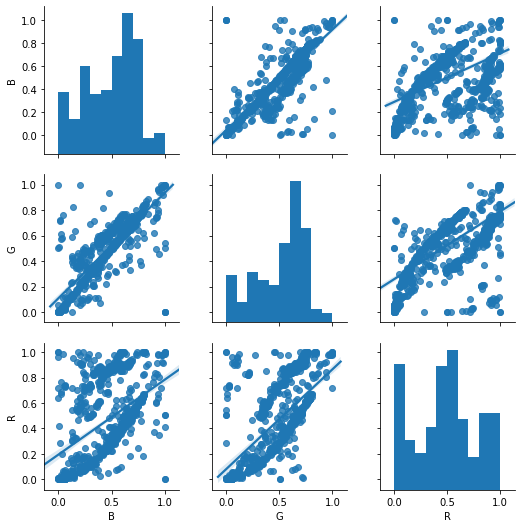

In [18]:
sns.pairplot(onlybgr, kind="reg")

In [19]:
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

In [20]:
x = feature.values
y = label.values

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [22]:
len(xtrain),len(xtest)

(196045, 49012)

In [23]:
data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

((196045, 3), (196045, 1), (196045, 4))

In [24]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [25]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [26]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]

In [27]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [28]:
write = writepickle(datadict,'data.pkl')

In [29]:
data = readpickle('data.pkl')

In [30]:
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']

In [31]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [32]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [33]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

In [34]:
import numpy as np
#x = np.c_[np.ones((x.shape[0], 1)), x]
#y = y[:, np.newaxis]
#theta = np.zeros((x.shape[1], 1))

Signature: logisticRegr.score(X, y, sample_weight=None)
Docstring:
Returns the score using the `scoring` option on the given
test data and labels.

Parameters
----------
X : array-like, shape = (n_samples, n_features)
    Test samples.

y : array-like, shape = (n_samples,)
    True labels for X.

sample_weight : array-like, shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    Score of self.predict(X) wrt. y.
File:      c:\users\simon\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py
Type:      method


In [35]:
logisticRegr = LogisticRegressionCV()
logisticRegr.fit(xtrain, ytrain.ravel())
scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
print(scoreVal)
print(scoreTest)

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9188961717972914
0.9189178160450502


fold1
fold2
fold3
fold4
fold5


___________________________
       |    ACCURACY
FOLD   |      VAL     |    TEST      |  AUC
___________________________
       |              |              |
1      |  '0.918896'  |  '0.918918'  |  '0.950284'
2      |  '0.917748'  |  '0.918959'  |  '0.950518'
3      |  '0.919738'  |  '0.918795'  |  '0.950448'
4      |  '0.918412'  |  '0.919428'  |  '0.950475'
5      |  '0.919763'  |  '0.919020'  |  '0.950351'
___________________________
AVG    |  '0.918911'  |  '0.919024'  |  '0.950415'  


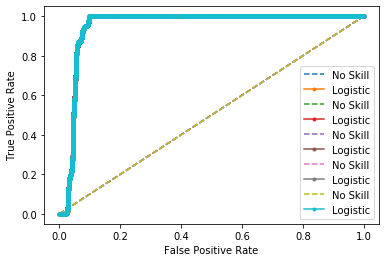

In [56]:
#setting up proper formatting
print("___________________________")
print("       |    ACCURACY")
print("FOLD   |      VAL     |    TEST      |  AUC")
print("___________________________")
print("       |              |              |")
sumVal = 0
sumTest = 0
sumAUC = 0

#ignores warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)



#first iteration - also could use dictionary but its confusing so copy/paste
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']
xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']
ns_probs = [0 for i in range(len(ytest))]
logisticRegr.fit(xtrain, ytrain.ravel())

# predict probabilities
lr_probs = logisticRegr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
#pyplot.show()



#sns.regplot(x='xtrain', y='ytrain', data=data, logistic=True)
scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
sumVal += scoreVal
sumTest += scoreTest
sumAUC += lr_auc
print(("1      |  '%f'  |  '%f'  |  '%f'") %(scoreVal, scoreTest,lr_auc))
dict1 = {'fold1':{'val':scoreVal, 'test':scoreTest, 'auc':lr_auc}}

#iteration 2
scoreVal = 0
scoreTest = 0
fold2 = data['fold2']
fold2_train = fold2['train']
fold2_val = fold2['val']
fold2_test = fold2['test']
xtrain, ytrain = fold2_train['x'],fold2_train['y']
xval, yval = fold2_val['x'], fold2_val['y']
xtest, ytest = fold2_test['x'],fold2_test['y']
logisticRegr.fit(xtrain, ytrain.ravel())

# predict probabilities
lr_probs = logisticRegr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
#pyplot.show()

#sns.regplot(x='xtrain', y='ytrain', data=data, logistic=True)
scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
sumVal += scoreVal
sumTest += scoreTest
sumAUC += lr_auc
print(("2      |  '%f'  |  '%f'  |  '%f'") %(scoreVal, scoreTest,lr_auc))
dict2 = {'fold2':{'val':scoreVal, 'test':scoreTest, 'auc':lr_auc}}
dict1.update(dict2)

scoreVal = 0
scoreTest = 0
fold3 = data['fold3']
fold3_train = fold3['train']
fold3_val = fold3['val']
fold3_test = fold3['test']
xtrain, ytrain = fold3_train['x'],fold3_train['y']
xval, yval = fold3_val['x'], fold3_val['y']
xtest, ytest = fold3_test['x'],fold3_test['y']
logisticRegr.fit(xtrain, ytrain.ravel())
y_pred = logisticRegr.predict(xtest)


# predict probabilities
lr_probs = logisticRegr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
#pyplot.show()

scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
sumVal += scoreVal
sumTest += scoreTest
sumAUC += lr_auc
print(("3      |  '%f'  |  '%f'  |  '%f'") %(scoreVal, scoreTest,lr_auc))
#dict3 = {'fold3':scoreVal, 'fold3':scoreTest, 'fold3':lr_auc}
dict3 = {'fold3':{'val':scoreVal, 'test':scoreTest, 'auc':lr_auc}}
dict1.update(dict3)

fold4 = data['fold4']
fold4_train = fold4['train']
fold4_val = fold4['val']
fold4_test = fold4['test']
xtrain, ytrain = fold4_train['x'],fold4_train['y']
xval, yval = fold4_val['x'], fold4_val['y']
xtest, ytest = fold4_test['x'],fold4_test['y']
logisticRegr.fit(xtrain, ytrain.ravel())
y_pred = logisticRegr.predict(xtest)
#print('log: ', metrics.accuracy_score(ytest, y_pred))
#sns.regplot(x='xtrain', y='ytrain', data=data, logistic=True)

# predict probabilities
lr_probs = logisticRegr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
#pyplot.show()

scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
sumVal += scoreVal
sumTest += scoreTest
sumAUC += lr_auc
print(("4      |  '%f'  |  '%f'  |  '%f'") %(scoreVal, scoreTest,lr_auc))
#dict4 = {'fold4':scoreVal, 'fold4':scoreTest, 'fold4':lr_auc}
dict4 = {'fold4':{'val':scoreVal, 'test':scoreTest, 'auc':lr_auc}}
dict1.update(dict4)

fold5 = data['fold5']
fold5_train = fold5['train']
fold5_val = fold5['val']
fold5_test = fold5['test']
xtrain, ytrain = fold5_train['x'],fold5_train['y']
xval, yval = fold5_val['x'], fold5_val['y']
xtest, ytest = fold5_test['x'],fold5_test['y']
logisticRegr.fit(xtrain, ytrain.ravel())
y_pred = logisticRegr.predict(xtest)
#print('log: ', metrics.accuracy_score(ytest, y_pred))
#sns.regplot(x='xtrain', y='ytrain', data=data, logistic=True)

# predict probabilities
lr_probs = logisticRegr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
#pyplot.show()
scoreVal = logisticRegr.score(xval, yval)
scoreTest = logisticRegr.score(xtest, ytest)
sumVal += scoreVal
sumTest += scoreTest
sumAUC += lr_auc
print(("5      |  '%f'  |  '%f'  |  '%f'") %(scoreVal, scoreTest,lr_auc))

dict5 = {'fold5':{'val':scoreVal, 'test':scoreTest, 'auc':lr_auc}}

dict1.update(dict5)

sumVal /= 5
sumTest /= 5
sumAUC /= 5
print("___________________________")
print(("AVG    |  '%f'  |  '%f'  |  '%f'  ") %(sumVal, sumTest, sumAUC))

In [54]:
dict1

{'fold1': {'val': 0.9188961717972914,
  'test': 0.9189178160450502,
  'auc': 0.9502840088038078},
 'fold2': {'val': 0.9177484761151776,
  'test': 0.9189586223781931,
  'auc': 0.9505176299915947},
 'fold3': {'val': 0.9197378152975082,
  'test': 0.9187953970456215,
  'auc': 0.9504484672941949},
 'fold4': {'val': 0.9184115891759544,
  'test': 0.9194278952093365,
  'auc': 0.9504751050254063},
 'fold5': {'val': 0.9197633196459997,
  'test': 0.9190198318779075,
  'auc': 0.9503511655118356}}

In [59]:
df = pd.DataFrame(data = dict1)


In [60]:
df

,fold1,fold2,fold3,fold4,fold5
auc,0.950284,0.950518,0.950448,0.950475,0.950351
test,0.918918,0.918959,0.918795,0.919428,0.919020
val,0.918896,0.917748,0.919738,0.918412,0.919763


[{'ta': 51, 'va': 13, 'te': 88},
 {'ta': 12, 'va': 73, 'te': 62},
 {'ta': 47, 'va': 26, 'te': 77},
 {'ta': 100, 'va': 25, 'te': 13},
 {'ta': 30, 'va': 27, 'te': 73}]

In [44]:
df = pd.DataFrame(data = results)

In [45]:
df

,ta,te,va
0,51,88,13
1,12,62,73
2,47,77,26
3,100,13,25
4,30,73,27


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

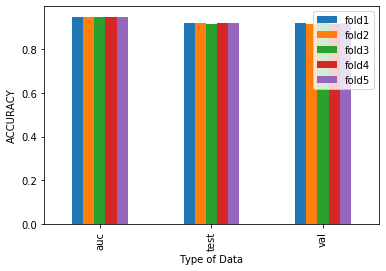

In [64]:
df.plot(kind = 'bar')
plt.xlabel('Type of Data')
plt.ylabel('ACCURACY')
